In [94]:
#Importing neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn import linear_model
from sklearn.metrics import r2_score
import plotly.express as px
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
import scipy.stats as stats
import pylab
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import KNNImputer

In [95]:
# Loading dataset
data=pd.read_csv("C:/Users/sande/OneDrive/Desktop/summer analytics/hackthon 1/train.csv")

Initial Look on Data

In [96]:
data.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1


In [97]:
data.shape

(15730, 16)

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15730 entries, 0 to 15729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          15730 non-null  int64  
 1   title       15730 non-null  object 
 2   Rating      15730 non-null  float64
 3   maincateg   15204 non-null  object 
 4   platform    15730 non-null  object 
 5   price1      15730 non-null  int64  
 6   actprice1   15730 non-null  int64  
 7   Offer %     15730 non-null  object 
 8   norating1   15052 non-null  float64
 9   noreviews1  15152 non-null  float64
 10  star_5f     15142 non-null  float64
 11  star_4f     15191 non-null  float64
 12  star_3f     15499 non-null  float64
 13  star_2f     15730 non-null  int64  
 14  star_1f     15730 non-null  int64  
 15  fulfilled1  15730 non-null  int64  
dtypes: float64(6), int64(6), object(4)
memory usage: 1.9+ MB


In [99]:
#checking missing value 
data.isnull().sum()

id              0
title           0
Rating          0
maincateg     526
platform        0
price1          0
actprice1       0
Offer %         0
norating1     678
noreviews1    578
star_5f       588
star_4f       539
star_3f       231
star_2f         0
star_1f         0
fulfilled1      0
dtype: int64

In [100]:
#checking duplicates value
data.duplicated().sum()

0

In [101]:
data.describe()

,id,Rating,price1,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
count,15730.000000,15730.000000,15730.000000,15730.000000,15052.000000,15152.000000,15142.000000,15191.000000,15499.000000,15730.000000,15730.000000,15730.000000
mean,10479.541577,4.012873,688.070693,1369.286777,3057.660776,423.976307,1585.239466,655.923310,357.260662,155.085188,275.500572,0.601526
std,6080.166276,0.298440,649.409586,1240.900227,11846.965689,1768.230384,6177.476241,2855.735531,1402.246610,558.650254,958.589075,0.489600
min,3.000000,0.000000,69.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5212.000000,3.900000,349.000000,699.000000,63.000000,9.000000,30.000000,12.000000,7.000000,3.000000,6.000000,0.000000
50%,10458.500000,4.000000,474.000000,999.000000,308.000000,44.000000,150.000000,60.000000,34.000000,17.000000,30.000000,1.000000
75%,15766.750000,4.200000,699.000000,1299.000000,1526.000000,215.000000,788.000000,300.000000,172.000000,77.000000,140.000000,1.000000
max,20973.000000,5.000000,5998.000000,13499.000000,289973.000000,45448.000000,151193.000000,74037.000000,34978.000000,11705.000000,18060.000000,1.000000


Data Preprocessing

In [102]:
# removing '%' from offer% column and changing it to float
data['Offer %']=data['Offer %'].str[0:4]
data['Offer %']=data['Offer %'].astype('float')
data['Offer %'][0:5]

0    30.1
1    50.0
2    45.0
3    15.8
4    40.0
Name: Offer %, dtype: float64

In [103]:
#KNN imputer
miss_col=data[['star_5f','star_4f','star_3f','noreviews1']]
knn_imp=KNNImputer(n_neighbors=5)
imp_col=knn_imp.fit_transform(miss_col)

In [104]:
#filling the missing value with knn imputer
data['star_5f']=imp_col[:,0]
data['star_4f']=imp_col[:,1]
data['star_3f']=imp_col[:,2]
data['noreviews1']=imp_col[:,3]

In [105]:
#total unique class in maincateg column
data['maincateg'].unique()

array(['Women', 'Men', nan], dtype=object)

In [106]:
#filling the missing value with their category with the help of product title
data.loc[data['title'].str.upper().str.contains('WOMEN') & data['maincateg'].isnull(), 'maincateg'] = 'Women'
data.loc[data['title'].str.upper().str.contains('MEN') & data['maincateg'].isnull(), 'maincateg'] = 'Men'
data['maincateg'].isnull().sum()

57

In [107]:
#filling the remaining 57 value with new class 'unisex'
data.loc[data['maincateg'].isnull(), 'maincateg'] = 'Unisex'
print(data['maincateg'].isnull().sum())
print(data['maincateg'].unique())

0
['Women' 'Men' 'Unisex']


Insights

C:\Users\sande\AppData\Local\Temp\ipykernel_8640\4241847903.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

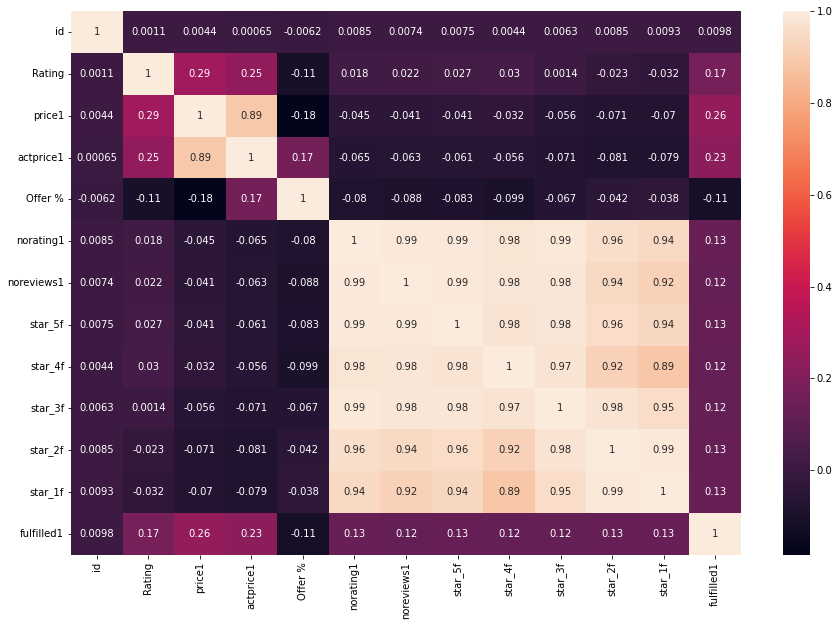

In [74]:
#correlation between all variables using heatmap
plt.figure(figsize=[15,10])
sns.heatmap(data.corr(),annot=True)

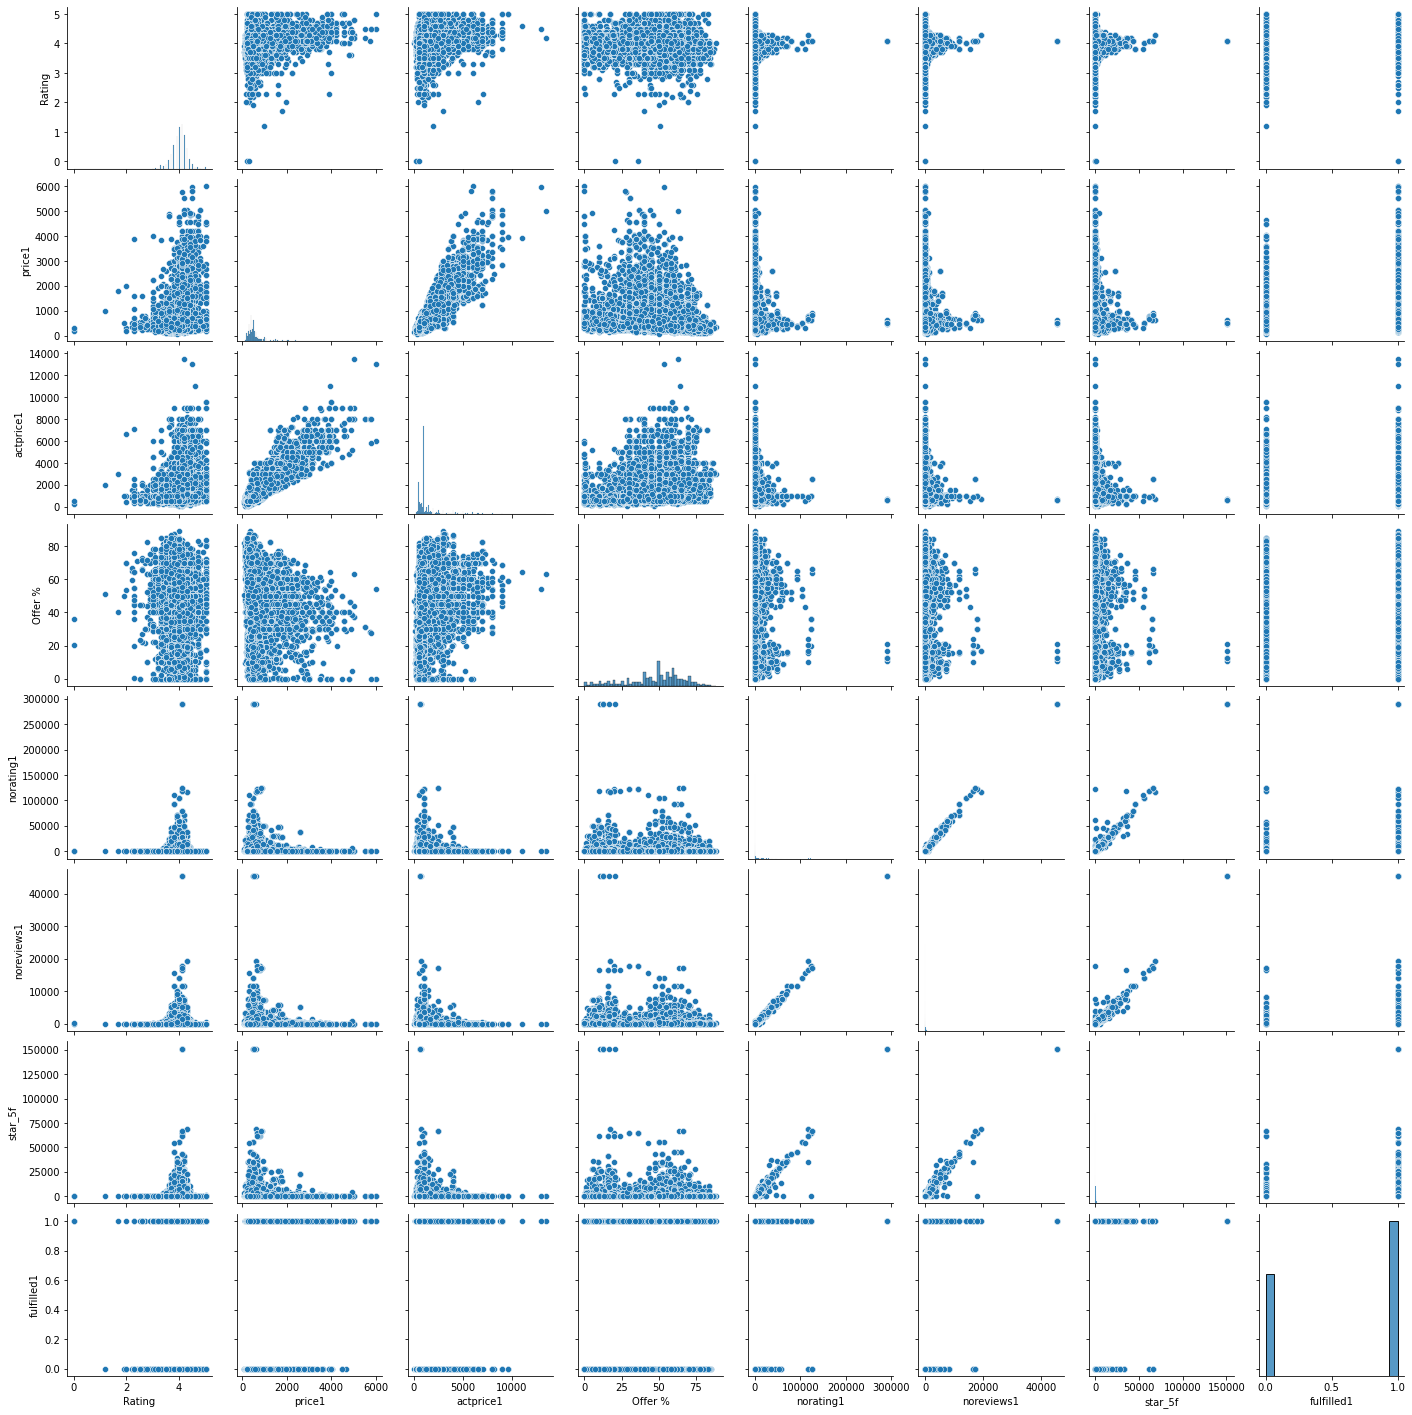

In [108]:
#pairplot
num_col=data[['Rating','price1','actprice1','Offer %','norating1','noreviews1','star_5f','fulfilled1']]
sns.pairplot(num_col)

C:\Users\sande\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sande\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sande\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

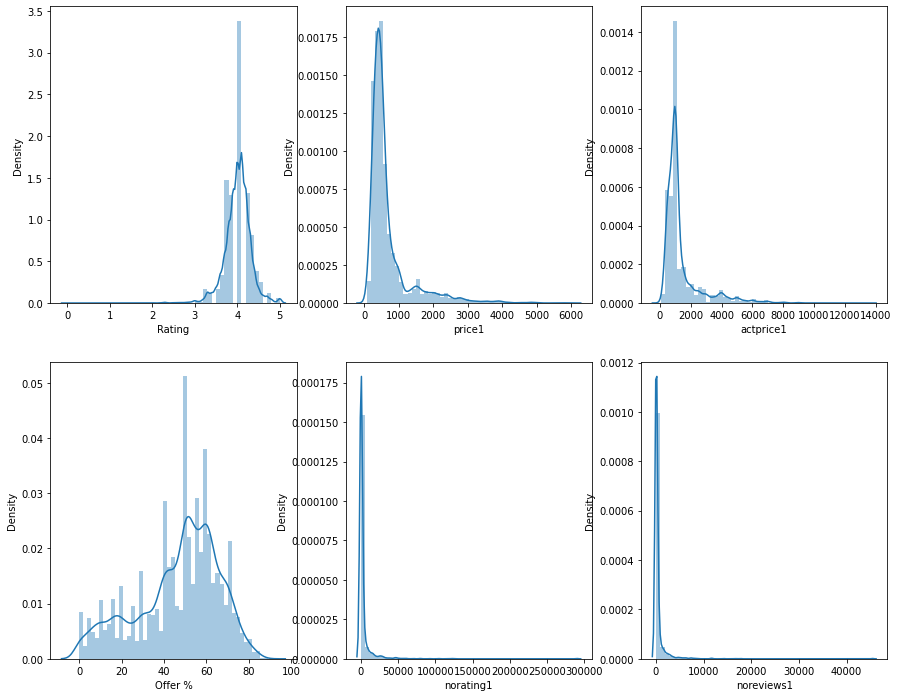

In [75]:
#distribution plot
plt.figure(figsize=(15,12))

plt_cols = ['Rating', 'price1', 'actprice1', 'Offer %', 'norating1', 'noreviews1']

# I didnt plot the star_f columns because they are highly correlated to norating1 and noreviews1 
# columns & have similar distributions to them

k=1
for i in plt_cols:
    plt.subplot(2,3,k)
    sns.distplot(data[i])
    k=k+1

C:\Users\sande\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sande\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: title={'center': 'Discounted Price'}, xlabel='price1', ylabel='Density'>

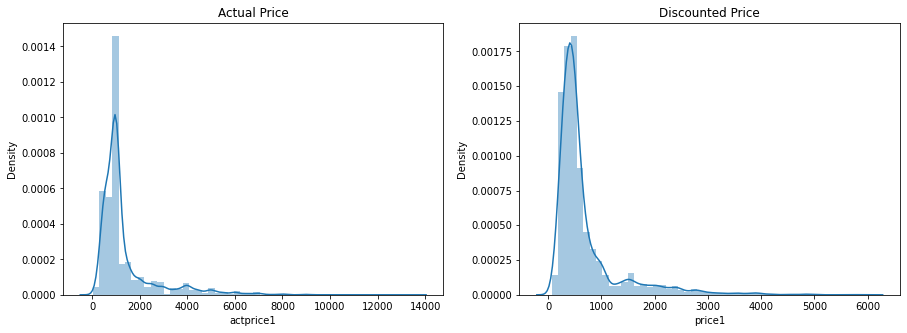

In [76]:
#distribution plot
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Actual Price')
sns.distplot(data['actprice1'])

plt.subplot(1,2,2)
plt.title('Discounted Price')
sns.distplot(data['price1'])

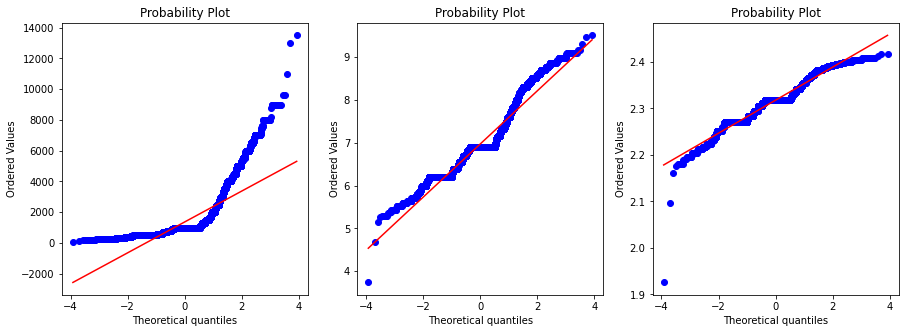

In [77]:
#QQ plot
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
stats.probplot(data['actprice1'],plot=pylab)   # No Transformation

plt.subplot(1,3,2)
stats.probplot(np.log(data['actprice1']),plot=pylab)   # Log Transformation

var, _ = stats.boxcox(data['actprice1'])
plt.subplot(1,3,3)
stats.probplot(var,plot=pylab)   # BoxCox Transformation

plt.show()

C:\Users\sande\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sande\anacond

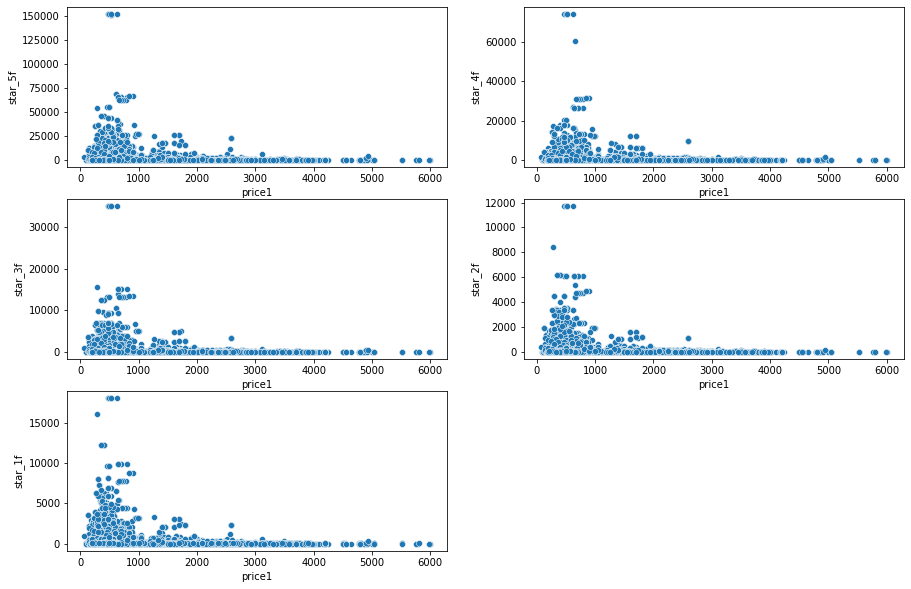

In [110]:
#scatter plot
plt.figure(figsize=[15,10])
star=data[['star_5f','star_4f','star_3f','star_2f','star_1f']]
          
k=1
for i in star: 
    plt.subplot(3,2,k)
    sns.scatterplot(data['price1'],data[i])
    k=k+1


In [78]:
#making actprice1 lognormal
data['logprice'] = np.log(data['actprice1'])

In [79]:
#encoding categorical variable
data['platform']=data['platform'].map({'Flipkart':1,'Amazon':0})
data=pd.get_dummies(data,columns=['maincateg'])
data=data.drop(['maincateg_Unisex'],axis=1)

In [80]:
data.head()

,id,title,Rating,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,logprice,maincateg_Men,maincateg_Women
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,1,698,999,30.1,38.0,7.0,17.0,9.0,6.0,3,3,0,6.906755,0,1
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,1,999,1999,50.0,531.0,69.0,264.0,92.0,73.0,29,73,1,7.600402,1,0
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,1,2749,4999,45.0,17.0,4.0,11.0,3.0,2.0,1,0,1,8.516993,0,1
3,495,Men Black Sports Sandal,4.2,1,518,724,15.8,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1,6.584791,1,0
4,16408,Men Green Sports Sandal,3.9,1,1379,2299,40.0,77.0,3.0,35.0,21.0,7.0,7,7,1,7.740230,1,0


Making new columns from most frequent words in title

In [81]:
# 100 most frequent words in title column

from collections import Counter

arr = []
for i in data['title'].str.split(' '):
    arr += i

c = Counter(arr)    
c_list = c.most_common(100)
c_list

# words = []

# for wd in  c_list:
#     words.append(wd[0])
        
# print(words)

[('For', 10241),
 ('Sandal', 4194),
 ('Shoes', 4163),
 ('Women', 3976),
 ('Running', 2024),
 ('Sneakers', 1806),
 ('Men', 1580),
 ('Black', 1499),
 ('Boots', 1471),
 ('Casual', 1454),
 ('Men\xa0\xa0(Black)', 1454),
 ('Bellies', 1093),
 ('for', 1080),
 ('Jutis', 1073),
 ('Flats', 1054),
 ('Heels', 1008),
 ('Women\xa0\xa0(Black)', 967),
 ('Flip', 894),
 ('Wedges', 875),
 ('Flops', 843),
 ('Stylish', 830),
 ('Walking', 775),
 ('Slip', 711),
 ('Slippers', 679),
 ('On', 663),
 ('Sports', 653),
 ('&', 639),
 ('Slides', 618),
 ('Casuals', 614),
 ('shoes', 593),
 ('Girls', 592),
 ('Women\xa0\xa0(Pink)', 578),
 ('Men\xa0\xa0(Brown)', 529),
 ('|', 505),
 ('Leather', 469),
 ('of', 458),
 ('Mojaris', 458),
 ('Pink', 455),
 ("Men's", 445),
 ('Women\xa0\xa0(Multicolor)', 442),
 ('Lace', 435),
 ('Brown', 435),
 ('Women\xa0\xa0(White)', 432),
 ('and', 430),
 ('Combo', 403),
 ('Grey', 378),
 ('Blue', 371),
 ('Pack', 361),
 ('Women\xa0\xa0(Grey)', 360),
 ('Men\xa0\xa0(Blue)', 356),
 ('High', 351),
 ('La

In [82]:
data['combo'] = data['title'].str.upper().str.contains('COMBO').astype(int)

In [83]:
sp_cols = ['Running','Black', 'Boots', 'Casual', 'Bellies', 'Jutis', 'Flats', 'Heels', 'Wedges', 'Stylish', 'Walking', 'Slip', 'Sports', 'Girls', 'Leather', 'Mojaris', 'Pink', 'Lace', 'Brown', 'Grey', 'Blue', 'Pack', 'Loafers', 'Beige', 'White', 'Red', 'Ethnic', 'Multicolor', 'Formal', 'Tan', 'Synthetic', 'Gold', 'Canvas', 'Party', 'dataing', 'IDP', 'Gym', 'Jutti', 'Ankle', 'New', 'Navy', 'Lightweight', 'Derby']

In [84]:
data['sandal'] = data['title'].str.upper().str.contains('SANDAL').astype(int)
data['sneaker'] = data['title'].str.upper().str.contains('SNEAKER').astype(int)
data['shoe'] = data['title'].str.upper().str.contains('SHOE').astype(int)
data['chappal'] = (data['title'].str.upper().str.contains('SLIPPERS') | data['title'].str.upper().str.contains('SLIDES') | data['title'].str.upper().str.contains('FLIP FLOPS')).astype(int)

In [85]:
for cl in sp_cols:
    data[cl] = data['title'].str.upper().str.contains(cl.upper()).astype(int)

In [86]:
data.drop('title', axis='columns', inplace=True)

In [87]:
data = data[(['Rating','actprice1', 'price1', 'fulfilled1', 'sandal', 'sneaker', 'shoe', 'chappal', 'maincateg_Men','maincateg_Women', 'platform','combo','logprice','star_5f','star_4f','star_3f','star_2f','star_1f']) + sp_cols]
data.head()

,Rating,actprice1,price1,fulfilled1,sandal,sneaker,shoe,chappal,maincateg_Men,maincateg_Women,...,Party,dataing,IDP,Gym,Jutti,Ankle,New,Navy,Lightweight,Derby
0,3.9,999,698,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.8,1999,999,1,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,4.4,4999,2749,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4.2,724,518,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,3.9,2299,1379,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
# divinding the dataset into response and target variable
x=data.drop(['price1'],axis=1)
y=data['price1']

In [89]:
x.shape,y.shape

((15730, 60), (15730,))

# Modeling

In [120]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
std=StandardScaler()
x_std=std.fit_transform(x)
score=cross_val_score(lr,x_std,y,cv=10).mean()
score

0.8103079239302255

In [113]:
dt=DecisionTreeRegressor()
score=cross_val_score(dt,x,y,cv=10).mean()
score

0.8770166284164628

In [114]:
lgb=LGBMRegressor()
score=cross_val_score(lgb,x,y,cv=10).mean()
score

0.892446706013228

In [115]:
xgb=XGBRegressor()
score=cross_val_score(xgb,x,y,cv=10).mean()
score

0.913868023478881

In [117]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
score=cross_val_score(rf,x,y,cv=10).mean()
score

0.9243924227070046

In [119]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
r2_score(y_test,y_pred)

0.91483071310414